In [1]:
# Udemy: Explore, Track, Predict the ISS in Realtime with Python
# https://www.udemy.com/course/explore-track-and-predict-the-iss-in-realtime-with-python/learn/lecture/17837824#content


In [1]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

In [2]:
# 1. Who are the astronauts on board right now

import requests

# Requests: library for making HTTP requests in Python

In [4]:
# API source: open-notify.org
r = requests.get(url="http://api.open-notify.org/astros.json")
r.json()

# .json() -> output is a json dictionary, the items can be accessed by key

{'message': 'success',
 'number': 7,
 'people': [{'craft': 'ISS', 'name': 'Sergey Ryzhikov'},
  {'craft': 'ISS', 'name': 'Kate Rubins'},
  {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'},
  {'craft': 'ISS', 'name': 'Mike Hopkins'},
  {'craft': 'ISS', 'name': 'Victor Glover'},
  {'craft': 'ISS', 'name': 'Shannon Walker'},
  {'craft': 'ISS', 'name': 'Soichi Noguchi'}]}

In [5]:
# Where is the International Space Station (ISS) right now?

import pandas as pd

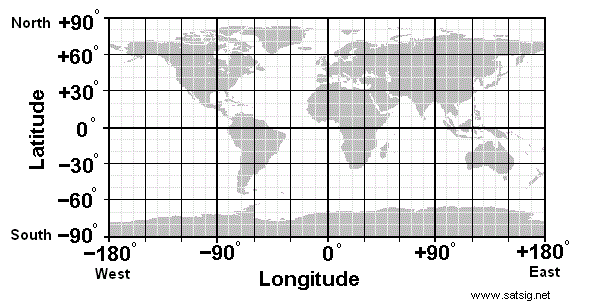

In [11]:
# https://www.satsig.net/lat_long.htm
#Image(filename="C:/Users/Agnieszka/Downloads/world105.gif", width = "60%")
Image(filename="world105.gif", width = "100%")

In [4]:
r = requests.get(url="http://api.open-notify.org/iss-now.json")
ISS_location = (r.json())
print(ISS_location)

{'timestamp': 1610973933, 'iss_position': {'latitude': '-15.8969', 'longitude': '40.3755'}, 'message': 'success'}


In [44]:
ISS_location["timestamp"]

1610970976

In [45]:
# Long and lat are strings -> conversion into float

float(ISS_location["iss_position"]["latitude"])

23.9873

In [3]:
# Plotting the ISS current location

# To prevent the KeyError: PROJ_LIB 
import os
os.environ['PROJ_LIB'] = "C:/Users/Agnieszka/anaconda3/share/proj"
# '/home/YOUR_USER/anaconda3/share/proj'

from mpl_toolkits.basemap import Basemap

Text(0.5, 1.0, 'International Space Station Location')

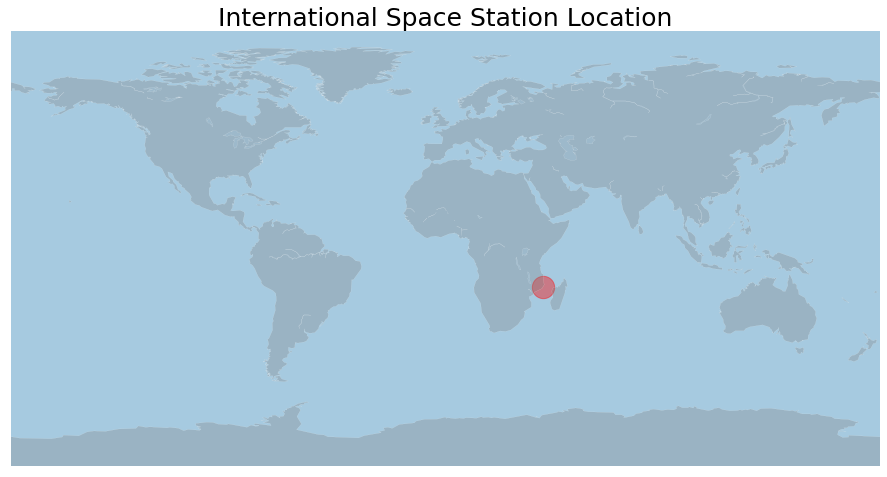

In [5]:
plt.figure(figsize=(16,8))

# The background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90)
m.drawmapboundary(fill_color="#A6CAE0", linewidth=0)
m.fillcontinents(color="grey", alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# ISS Position

# m.scatter(long, lat)
m.scatter(float(ISS_location["iss_position"]["longitude"]),
          float(ISS_location["iss_position"]["latitude"]),
          s=500, alpha=0.4, color="red"
)

plt.title("International Space Station Location", fontsize=25)

In [54]:
import datetime
date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
date_to_print

'20210118131639'

In [6]:
# Collect data - try to let it over

# This must be changed to "True" to start collecting data:
record_data = False

if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    
    import time
    starttime=time.time()
    
    ISS_data = []

    # While loop is an infinite loop -> "safety break" 
    
    while True:
        r = requests.get(url="http://api.open-notify.org/iss-now.json")
        ISS_location = (r.json())
        print(ISS_location)
        
        ISS_data.append([ISS_location["timestamp"],
                        ISS_location["iss_position"]["latitude"],
                        ISS_location["iss_position"]["longitude"]
                        ])
        # Dump copy to file
        tmp_ISS_data_df = pd.DataFrame(ISS_data, columns=["timestamp", "latitude", "longitude"])
        tmp_ISS_data_df.to_csv("ISS_location" + date_to_print + ".csv", index=None)
        
        # safety break
        #if len(ISS_data) > 18000:
        if len(ISS_data) > 600:
            break
            
        # 60 seconds break
        # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
        # Lock time loop to the system clock:
        time.sleep(60.0 - ((time.time() - starttime) % 60.0))
        

In [7]:
# 2. Visualize the historical data

In [8]:
iss_flight_record = pd.read_csv("ISS_location20210118132206.csv")
iss_flight_record.head()

,timestamp,latitude,longitude
0,1610972526,-46.9736,-62.5846
1,1610972586,-48.4497,-57.5598
2,1610972646,-49.6801,-52.2017
3,1610972706,-50.6262,-46.5870
4,1610972766,-51.2666,-40.7713


In [10]:
iss_flight_record.shape

(20, 3)

In [12]:
[dt for dt in iss_flight_record["timestamp"]]

[1610972526,
 1610972586,
 1610972646,
 1610972706,
 1610972766,
 1610972826,
 1610972886,
 1610972946,
 1610973006,
 1610973066,
 1610973126,
 1610973186,
 1610973246,
 1610973306,
 1610973366,
 1610973426,
 1610973486,
 1610973546,
 1610973606,
 1610973666]

In [13]:
[dt for dt in [1,2,3]]

[1, 2, 3]

In [ ]:
[dt +1 for dt in [1,2,3]]

In [14]:
from datetime import datetime
# datetime.fromtimestammp() - Return the local date corresponding to the POSIX timestamp
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record["timestamp"]]
date_time

[datetime.datetime(2021, 1, 18, 13, 22, 6),
 datetime.datetime(2021, 1, 18, 13, 23, 6),
 datetime.datetime(2021, 1, 18, 13, 24, 6),
 datetime.datetime(2021, 1, 18, 13, 25, 6),
 datetime.datetime(2021, 1, 18, 13, 26, 6),
 datetime.datetime(2021, 1, 18, 13, 27, 6),
 datetime.datetime(2021, 1, 18, 13, 28, 6),
 datetime.datetime(2021, 1, 18, 13, 29, 6),
 datetime.datetime(2021, 1, 18, 13, 30, 6),
 datetime.datetime(2021, 1, 18, 13, 31, 6),
 datetime.datetime(2021, 1, 18, 13, 32, 6),
 datetime.datetime(2021, 1, 18, 13, 33, 6),
 datetime.datetime(2021, 1, 18, 13, 34, 6),
 datetime.datetime(2021, 1, 18, 13, 35, 6),
 datetime.datetime(2021, 1, 18, 13, 36, 6),
 datetime.datetime(2021, 1, 18, 13, 37, 6),
 datetime.datetime(2021, 1, 18, 13, 38, 6),
 datetime.datetime(2021, 1, 18, 13, 39, 6),
 datetime.datetime(2021, 1, 18, 13, 40, 6),
 datetime.datetime(2021, 1, 18, 13, 41, 6)]

In [16]:
# add data_time to the dataframe "iss_flight_record"

iss_flight_record["date"]=date_time
iss_flight_record.head()

,timestamp,latitude,longitude,date
0,1610972526,-46.9736,-62.5846,2021-01-18 13:22:06
1,1610972586,-48.4497,-57.5598,2021-01-18 13:23:06
2,1610972646,-49.6801,-52.2017,2021-01-18 13:24:06
3,1610972706,-50.6262,-46.5870,2021-01-18 13:25:06
4,1610972766,-51.2666,-40.7713,2021-01-18 13:26:06


In [17]:
# Add Index for a varying plot size from oldest to newest (small to big)

iss_flight_record["index"] = range(1, len(iss_flight_record)+1)
iss_flight_record.head()

,timestamp,latitude,longitude,date,index
0,1610972526,-46.9736,-62.5846,2021-01-18 13:22:06,1
1,1610972586,-48.4497,-57.5598,2021-01-18 13:23:06,2
2,1610972646,-49.6801,-52.2017,2021-01-18 13:24:06,3
3,1610972706,-50.6262,-46.5870,2021-01-18 13:25:06,4
4,1610972766,-51.2666,-40.7713,2021-01-18 13:26:06,5


Text(0.5, 1.0, 'ISS positon on 18.01.2021 (13:22 - 13:42)')

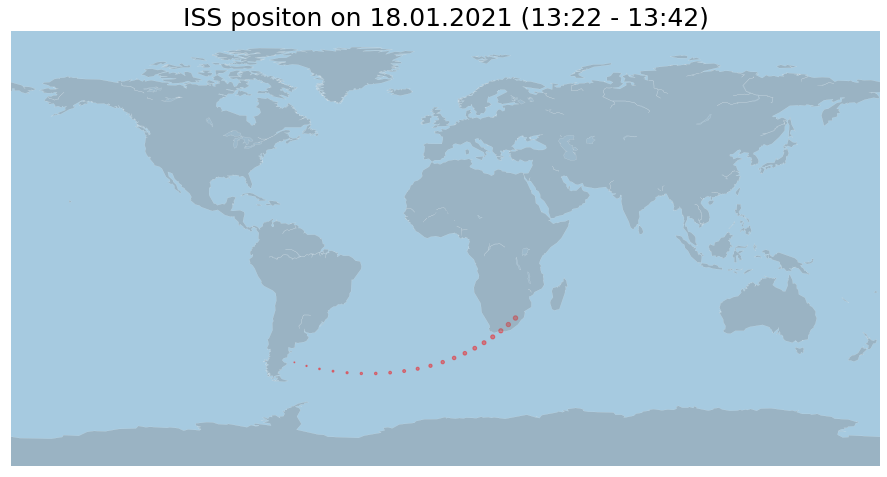

In [22]:
plt.figure(figsize=(16,8))

# The background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90)
m.drawmapboundary(fill_color="#A6CAE0", linewidth=0)
m.fillcontinents(color="grey", alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# ISS Position

# m.scatter(long, lat)
m.scatter(iss_flight_record["longitude"],
          iss_flight_record["latitude"],
          s=iss_flight_record["index"], alpha=0.4, color="red"
)

plt.title("ISS positon on 18.01.2021 (13:22 - 13:42)", fontsize=25)

In [23]:
# 3. Predicting where ISS is going with linear and polynomial regression

# Linear Regression 

In [24]:
tmp_df = iss_flight_record.tail(10)
tmp_df

,timestamp,latitude,longitude,date,index
10,1610973126,-48.3862,-6.2451,2021-01-18 13:32:06,11
11,1610973186,-46.8852,-1.1929,2021-01-18 13:33:06,12
12,1610973246,-45.1528,3.5493,2021-01-18 13:34:06,13
13,1610973306,-43.2158,7.9803,2021-01-18 13:35:06,14
14,1610973366,-41.1178,12.0772,2021-01-18 13:36:06,15
15,1610973426,-38.8469,15.9264,2021-01-18 13:37:06,16
16,1610973486,-36.4412,19.5152,2021-01-18 13:38:06,17
17,1610973546,-33.9197,22.8675,2021-01-18 13:39:06,18
18,1610973606,-31.3212,25.9833,2021-01-18 13:40:06,19
19,1610973666,-28.6163,28.9399,2021-01-18 13:41:06,20


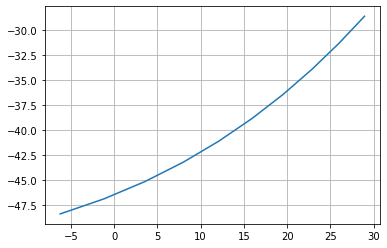

In [26]:
plt.plot(tmp_df["longitude"],tmp_df["latitude"])
plt.grid()

In [27]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df["longitude"],
    y = tmp_df["latitude"])

print("Intercept: ", intercept)
print("Slope: ", slope)

Intercept:  -46.651890055389686
Slope:  0.5611683405619958


In [28]:
predicted_latitude = np.ceil(intercept + slope * 30)

print("Next predicted point: ", predicted_latitude)

Next predicted point:  -29.0


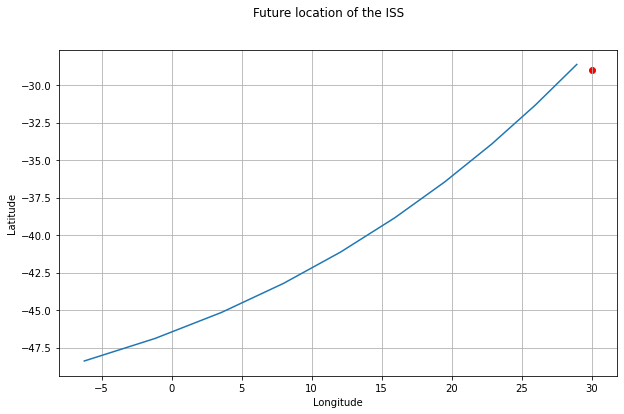

In [30]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(tmp_df["longitude"],
        tmp_df["latitude"])

plt.suptitle("Future location of the ISS")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

plt.scatter([30], [predicted_latitude], color="red")

In [32]:
# Polynomial regression

x = tmp_df["longitude"]
y = tmp_df["latitude"]

poly_regression =np.poly1d(np.polyfit(x,y,3))

In [38]:
predicted_latitude2 = poly_regression(30)

print("Next predicted point: ", predicted_latitude2)

Next predicted point:  -27.590968362449885


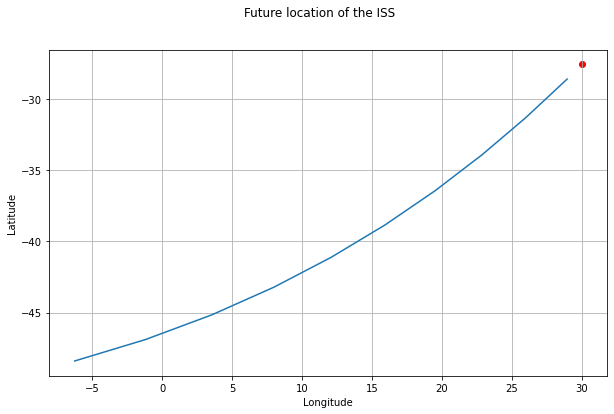

In [39]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(tmp_df["longitude"],
        tmp_df["latitude"])

plt.suptitle("Future location of the ISS")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

plt.scatter([30], [predicted_latitude2], color="red")

In [ ]:
# Web application with Flask -> later

# pythonanywhere.com 
